---------------------------------------![Team_lost](TeamLost.jpg)---------------------------------------

### Réaliser un projet est difficile comme on le sait tous. Heureusement, notre projet est à faire en groupe chacun donc une partie. Ma partie à moi consiste à traiter et reprensentés les données des cas de Covid en France (entière ) du commencement jusqu'à nos jours. Au début, c'était pas facile de trouver les données à  traiter mais heureusement **"DATA.GOUV"** est là. 
### Puis on est tomber dessus sur ses donnés  (https://www.data.gouv.fr/fr/pages/donnees-coronavirus) alors il nous restait juste à choisir. 
### **Personnellement moi j'ai pris ce donnée là (https://www.data.gouv.fr/fr/datasets/donnees-relatives-a-lepidemie-de-covid-19-en-france-vue-densemble/) et puis je les traiter comme vous allez voir un peu en dessous de ce resumé.**

### Des modules j'en ai utiliser plein (présentés un peu plus tard ci-dessous avec les importations) mais ce qui m'a vraiment permis de réaliser ma partie de se projet c'est le module Pandas.

### *Information: les données que j'ai ici sur le Coronavirus debute le **2020-03-02 (= 2 mars 2020)** donc veuillez si vous entrez des dates de mettre des dates **supérieur ou égale** à ça car **sinon ça** provoquera une **erreur**. De plus, la derniere date de notre donnée est celui d'hier. Aussi je reviens sur un point important pour ne pas trop avoir une longue page j'ai englobé plusieur fonctions dans une seule. Et si par exmple un donnée vous perturbe alors il vous suffit de faire un `print()` sur ce donnee. Merci!!!*

--------------------------------------------------------------------------------![logo_Lost_Team](LostTeam.PNG)-------------------------------------------------------------------------------------------------

# **Importations des modules :**

In [1]:
import requests # module requests

>  **"requests"** est un module python permettant d'utiliser le protocole http de façon ultra simple! Je l'ai découvert en étant curieux.

In [2]:
import pandas as pan

>  **"pandas"** nous permet de manipuler aisément les données d’une série ou d’un dataFrame, de lire des fichiers, d’appliquer des fonctions aux données …  

In [3]:
import matplotlib.pyplot as perf

> **"matplotlib"**  est une bibliothèque du langage de programmation python qui, combinée avec les bibliothèques python de calcul scientifique numpy (qu'on va utiliser ici ) etc..,      constitue un puissant outil pour tracer
et visualiser des données.

In [4]:
import numpy as np

> **"numpy"** est une bibliothèque permet d’effectuer des calculs numériques avec Python. Elle introduit une gestion facilitée des tableaux de nombres.

In [5]:
from copy import deepcopy

> **"copy"** est une librairie qui nous permet en python de copier l'élément à copier sans modifier l'élément.

--------------------------------------------------------------------------------![logo_Lost_Team](LostTeam.PNG)-------------------------------------------------------------------------------------------------

# **(I) Les  fonctions qui suivent sont des fonctions qui vont traiter les données choisis et télécharger.**

### **(a)** La fonction **telecharge_et_ecrit(url, nom_fichierCSV)** prend deux paramètres : 

>####           **url** => c'est l'url du site où on veut prendre les données ici c'est sur DATA-GOUV
>####           **nom_fichierCSV** => c'est dans celui-ci qu'on va écrire les données prises
### retourne un **fichier_csv**

In [6]:
synthese_donnee = "synthese_covid_fr.csv"

In [7]:
cas = "total_cas_confirmes "

In [8]:
lien = "https://www.data.gouv.fr/fr/datasets/donnees-relatives-a-lepidemie-de-covid-19-en-france-vue-densemble/"
url = "https://www.data.gouv.fr/fr/datasets/r/d3a98a30-893f-47f7-96c5-2f4bcaaa0d71"

https://www.data.gouv.fr/fr/datasets/donnees-relatives-a-lepidemie-de-covid-19-en-france-vue-densemble

In [9]:
def telecharge_et_ecrit(url, nom_fichierCSV):
    fichier_a_prendre = requests.get(url)  
    #La méthode GET indique que vous essayez d'obteni ou de récupérer des données d'une ressource spécifique

    fichier_a_prendre.encoding="utf-8" 
    #facultatif juste pour mettre en encodage utf-8

    texte = fichier_a_prendre.text 
    #Retourne le contenu en unicode .content => retourne le contenu en byte
    
    texte = texte.split("\r\n")
    #retourne une liste de chaine de caractères en decoupant à "\r\n"
    
    fichier_csv = open (nom_fichierCSV, "w", encoding="utf-8") 
    #j'ouvre un fichier en mode ecriture, à chaque ouverture le contenu du fichier est écrasé.
    #Si le fichier n'existe pas python le crée.
    
    for ligne in texte: #pour chaque element de la liste dans "texte"
        fichier_csv.write(ligne + "\n")  # on l'écrit dans le nouveau fichier csv suivi d'un saut à la ligne 
    fichier_csv.close() #je ferme le fichier
    
    return fichier_csv
    
    

### **(b)** La fonction  **cle_annee(dic)** prend comme on voit ici un parametre **"dic"** et return **"annee"** c'est-à-dire la date.

In [10]:
def cle_annee(dataF):
    for cle in dataF:
        annee = cle
        return  annee

### **(c) Ci-dessous deux fonctions :**
>#### **max_dic(dic)** qui prend en parametre un **dataframe (=tableau à 2 dimensions)** et retourne la valeur max du   Data-Frame ici c'est le total cas-confirmé
      
>#### **somme(reste)** qui prend aussi  en parametre un **dataframe (ou bien si vous voulez  un type pandas.core.frame.DataFrame)**

In [11]:
def max_cas(dataF):
    return dataF.max()

In [12]:
def somme(dataF):
    reste_dataF = dataF[1:]
    somme_reste = reste_dataF.sum() #permet de sommet les valeurs indiqués
    return [reste_dataF,somme_reste]  # on retourne une liste de reste_dataF et la somme des restes.

### **(d) Les deux fonctions** qui suivent me permet de retourner un **dictionnaire** avec la valeur qu'on souhaite utiliser :

>#### **reste_confirme(k_confirme,S_reste)** qui prend **deux** paramètres : **le total des cas confirmé (cest-à-dire la valeur max du Data-Frame vu précédémment ) et la somme des restes du Data-Frame sans le max.** *(voir commentaire pour plus d'information)*

>####  **changement_cle(dico)** prend **un** parametre  de **type dictionnaire** et retourne le **dictionnaire avec la clé changer par un autre**.

In [13]:
def reste_confirme(k_confirme,S_reste):
    reste_pas_mort = k_confirme - S_reste
    #print(type(reste_pas_mort))
    
    reste_pas_mort = reste_pas_mort.to_dict()
    #je transforme le type pandas.Series(=tableau à une dimension) en dictionnaire
    
    return changement_cle(reste_pas_mort)
    #j'envoie le dictionnaire à la fonction indiqué

In [14]:
def changement_cle(dic):    
    for elem in dic:
    #je parcours le dictionnaire juste avoir la clé et la valeur  
        liste = [elem, dic[elem]]
        liste[0] = "pas_dc_juste_conf"
        #changement de clé
        
        dictionnaire = { liste[0] : liste[1]}
        #je retransforme en dictionnaire
        
    return dictionnaire

### **(e)** La fonction **transf_matplotlib(S_reste, pas_m_conf)** prend en parametre le **reste du Data-Frame (=S_reste)** et un **dictionnaire (=pas_m_conf)** qu'on avait retourné précédemment dans la fonction **"changement_cle(dic)"**.

>#### Cette fonction va me permettre **d'inclure le dictionnaire (=pas_m_conf) dans le Data-Frame (=S_reste)**

>#### Elle retourne une **liste** : 
>> *1er de type array (=> grace a Numpy)*

>> *2eme de type liste*

>> *3eme de type str*

>> *enfin le dernier de type Data-Frame*

In [15]:
def transf_matplotlib(S_reste, pas_m_conf):
    annee = cle_annee(S_reste)
    S_reste = S_reste.to_dict()
    #on transforme le Data-Frame en dictionnaire 
    
    S_reste[annee].update(pas_m_conf)
    #on ajoute au dictionnaire qu'on vient d'avoir le dictionnaire "pas_m_conf"
    
    data  = pan.DataFrame(S_reste)
    #on retransforme le dictionnaire "S_reste" modifié en Data-Frame
    
    list_nombre = np.array(list(data[annee]))
    #D'abord ici je liste les nommbres dans le Data-Frame avant de le changer en array (=> np.array permet de convertir une liste en tableau on aura besoin pour plus tard)
    
    nom_libel = list(data.T)
    #ici nom_libel est une liste des libellés ou bien nom des cas dans le Data-Frame transposé(=> T : transposée)
    #print(nom_libel)
    
    return [list_nombre, nom_libel,annee,data]

--------------------------------------------------------------------------------![logo_Lost_Team](LostTeam.PNG)-------------------------------------------------------------------------------------------------

### **" La fonction qu'on va voir ci-dessous est une fonction qui englobe les autres fonctions vu précédement c'est à dire que dans le corps de cette fonction on va faire des appelles aux fonctions précédants."**

In [16]:
# dessiner_pie(inter1,inter2) prend ici deux paramètres qui sont tous deux des chaines de caractères.

def dessiner_pie(date1,date2):
    synthese_covid_fr = telecharge_et_ecrit(url, synthese_donnee) 
    #appelle à la fonction telecharge_et_ecrit 
    
    tableau = pan.read_csv(synthese_donnee, index_col=0)
    #permet de lire le fichier csv qu'on à créér via la fonction "telecharge_et_ecrit" et index_col= 0 => sert à mettre la premiere colonne du tableau comme index (=ici la date).
    
    tableau = tableau.fillna(0) 
    #remplace NaN en 0    
    
    del(tableau["total_deces_ehpad"])
    del(tableau['total_cas_possibles_ehpad'])
    del(tableau['total_cas_confirmes_ehpad'])
    del(tableau['nouveaux_patients_hospitalises'])
    del(tableau['nouveaux_patients_reanimation'])
    #permet d'effacer les donnnés qu'on a pas besoin
    
    au_commencement = tableau[date1:date2].T
    #affecte à la variable "au_commencement" le tableau (ou le Data-Frame) transposé et découpé (ou slicer) du tableau normal.
    
    annee = cle_annee(au_commencement) 
    #appelle à la fonction cle_annee
    
    #au_commencement =  au_commencement.drop(au_commencement[au_commencement[annee]==0.0].index)   
    #cette ligne permet d'enlever les "0" dans le Data-Frame 
    
    cas_confirme = max_cas(au_commencement)
    #appelle à la fontion max_cas et on lui envoie un Data-Frame
    
    somme_des_reste = somme(au_commencement)
    #appelle à la fonction somme
    
    pas_mort_conf = reste_confirme(cas_confirme,somme_des_reste[1])
    #appelle à la fonction reste_confirme et on affecte le resulstat dans "pas_mort_conf"
    
    pour_matplo = transf_matplotlib(somme_des_reste[0],pas_mort_conf) 
    #appelle à la fontion trtransf_matplotlib et on affecte le resultat dans "pour_matplo"
    
    return [float(cas_confirme),pour_matplo, au_commencement]
    

--------------------------------------------------------------------------------![logo_Lost_Team](LostTeam.PNG)-------------------------------------------------------------------------------------------------

# **(II) Les fonctions qui suivent quant à eux vont nous permettre de représenter graphiquement les données qu'on avait traiter dans la partie (I)**

### **1.** Cette fonction est excuté **si et seuliment** le **choix de l'utilisateur égal à 1** dans la fonction englobante qu'on verra un peu en dessous de tout ça.

In [17]:
def si_choix_utilisateur_est_1(choix_utilisateur):
    print("\t\tEcrire la date que vous souhaitez observer tout seul au format AAAA-MM-JJ ") 
    print()
    #Indication  à la personne qui voit se code comment on se prend pour pouvoir avoir un resultat de comparaison de donnée.
    
    ecrire_date = input("Ecrire date(info : date doit être supérieur ou égale 2020-03-02 ) : ")
    copie_date = deepcopy(ecrire_date)
    
    donnee = dessiner_pie(ecrire_date,copie_date)
    #appelle à lafontion "dessiner_pie"  qui va nous retourner une liste composer : en 1er le nombre totale des cas en float, en 2ieme est une liste(voir les fonctions précédents), en 3ieme un Data-Frame 
    
    utile = donnee[1][3]
    data_barre = [donnee[0],utile]
    besoin = donnee_pour_barre(data_barre)
    #appelle à la fonction "donnee_pour_barre" qui va me retourné une liste à 5 élément.
    
    print("Voici les données qu'on a utilisé pour faire ce diagramme circulaire : \n")
    print(donnee[-1])
    
    diagramme_circulaire(besoin)
    #puis on envoi les données traiter se faire représentés dans un diagramme circulaire
   
    
    print("Est-ce-que le diagramme circulaire s'affiche bien, si oui taper  'oui' sinon 'non'")
    reponse = input("Votre réponse :")
    #ici je demande à la personne qui excecute ce code si le diagramme s'affiche (car au tout début Jupyter Lab prend du temps à chager tous ces fonctions) bien il tape "oui" si oui sinon "non"
    
    while reponse != "oui" and reponse != "non":
        print("C'est pas difficile comme  de choisir entre 'oui' et 'non' en dirait que c'est l'humais :) ")
        reponse = input("Le diagramme est bien montrer 'oui' ou 'non':")
    #je me sert un peu de ce boucle pour dire si l'utilisateur n'a pas écrit "oui" ou "non"  alors je le redemande en boucle d'ecrire si oui le graph est bien lisible sinon non.
    
    if reponse == "oui":
        return True
    else:
        print(20*"*",donnee[-1],20*"*")
        diagramme_circulaire(besoin)
        return  True
    #ici si l'utilisateur dis "non" alors je réafiche le diagramme circulaire

### **1.a.** Une fonction qui prend **deux parametre:**

>*1° Une liste de nombre à mettre en pourcentage..*

>*2° le nombre de total cas confirmé de Covid-19*

In [18]:
def pourcentage(liste,total):
    pct = []
    for nb in (liste) :
        pourcentage = (nb / total)*100
        pourcentage = round(pourcentage,2)
        pct.append(pourcentage)
    return pct

### **1.b.** On retrouve un peu beaucoup dans les fonctions **"si_choix_utilisateur_est_"** elle recoit comme parametre qu'on lui envoie. Elle retourne une **liste** à **5 éléments:

> *1er lieu : une liste des nombres*

> *2eme place : une liste des nom ou libéllés*

> *3eme place : annee ou encore la date complete*

> *4eme place : le total des cas confirmés CoV*

> *5eme et derniere place : une liste des pourcentage en fonction des totals cas confirmé*

In [19]:
def donnee_pour_barre(donne):
    data = donne
    total_cas = data[0]
    reste_donne = data[1]
    longueur = len(reste_donne)
    liste_0 = []
    liste_1 = []
    annee = cle_annee(reste_donne)
    #appelle à la fontion cle_annee
    
    for chiffre in range (longueur):
        liste_0.append(reste_donne[annee][chiffre])
        
    for nom in reste_donne.T:
        liste_1.append(nom)
    
    pct = pourcentage(liste_0,total_cas)
    #appelle à la fonction pourcentage pour avoir les pourcentages des données 
    
    return [liste_0,liste_1,annee,total_cas,pct] 

### **1.c.** La fonction ci dessous (=**diagramme_circulaire**) va nous permettre de représenter les données extrait sous forme de **diagrame circulaire**.

In [20]:
def diagramme_circulaire(donnee):
    nombre = donnee[0]
    libelle = donnee[1]
    annee = donnee[2]
    total = donnee[-2]
    #ceci indique la deuxieme élément de donnee en partant de la fin..
    
    perf.pie(nombre,pctdistance=1.2,labeldistance=1.5, textprops=dict(size=12,weight="bold"))
    
    pct = pourcentage(nombre,total)
    #appelle à la fonction pourcentage
    
    legende = [f'{libelle[nom]}\n{pct[nom]}%' for nom in range (len(nombre))]
    
    perf.title(("Répartion sur l'ensembles des totales cas confirmés en "+annee+"\n"), fontsize=20,color="r")
    perf.rcParams["figure.figsize"] = (10,10)
    perf.rcParams["text.color"] = "black"
    perf.rcParams["font.family"]= "serif"
    
    perf.legend(labels=legende,prop={"size":12,"weight":"bold"},loc="lower center",ncol=len(libelle))
    
    return perf.show() 

--------------------------------------------------------------------------------![logo_Lost_Team](LostTeam.PNG)-------------------------------------------------------------------------------------------------

### **2.** Cette fonction est excuté **si et seuliment** le **choix de l'utilisateur égal à 2** dans la fonction englobante qu'on verra un peu plus en dessous de tout ça.

In [21]:
def si_choix_utilisateur_est_2(choix_utilisateur):
    
    print("\t\tEcrire la date que vous souhaitez voir ou comparer au format AAAA-MM-JJ ")
    print()
    ecrire_date = input("Ecrire date(info : date doit être supérieur ou égale 2020-03-02 ) : ")
    copie_date = deepcopy(ecrire_date)
    nouveau_date = input("Ecrire une autre date que vous voulez comparez a celui du premier : ")
    copie_nouveau_date = deepcopy(nouveau_date)
    #perme d'afficher du texte à l'écran et intéragir avec l'utilisateur via la commande "input"
    
    donne = dessiner_pie(ecrire_date,copie_date)
    donne_1 = dessiner_pie(nouveau_date,copie_nouveau_date)
    #appelle à la fonction dessiner_pie
    
    
    
    utile = donne[1][3]
    utile1 = donne_1[1][3]
    data_barre = [donne[0],utile]
    data_barre1 = [donne_1[0],utile1]
    
    besoin = donnee_pour_barre(data_barre)
    besoin1 = donnee_pour_barre(data_barre1)
    #appelle à la fonction donnee_pour_barre vu précedemment
    
    print("Voici les données qu'on a utilisé pour faire ce diagramme circulaire : \n")
    print(f'\n {donne[-1].to_dict()} \n\n {donne_1[-1].to_dict()}')
    
    dia = dessiner_dia_barre([besoin,besoin1])
    #appelle à la fonction dessiner_dia_barre qui a une liste comme parametre.
    
    print("Est-ce-que le diagramme en barre s'affiche bien \n si oui taper  'oui' sinon 'non'")
    reponse = input("Votre réponse :")
    #ici je demande à la personne qui excecute ce code si le diagramme en barre s'affiche bien il tape "oui" si oui sinon "non"
    
    while reponse != "oui" and reponse != "non":
        print("C'est pas difficile comme  de choisir entre 'oui' et 'non' en dirait que c'est l'humais :) ")
        reponse = input("Le diagramme est bien montrer 'oui' ou 'non':")
    #comme dans la fonction " si_choix_utilisateur_est_1" ça permet que l'utilisateur écrit ce qu'il doit ecrire
    
    if reponse == "oui":
        return True
    else:
        print(f'\n {donne[-1].to_dict()} \n\n {donne_1[-1].to_dict()}')
        dessiner_dia_barre([besoin,besoin1])
        return True
    #je réaffiche sinon

### **2.a.** Cette fonction reçoit un **donne** qu'on lui envoie et qui va verifier **si la longueur** de ce donne **est égale 2** alors il va réprésenté **2 barres** sur le diagramme en barre **sinon 3.**

>#### **Remarque :** 

>>*Dans cette on fait plusieurs appellent à d'autre fonction*

In [22]:
def dessiner_dia_barre(donne):
    if len(donne) < 3:
        data = donne[0]
        data1 = donne[1]
        grosseur = 0.25
        parametre_barre(data,data1,grosseur)
        #appelle à la fontion "parametre_barre" qui prend 3 params
        
        parametre_titre()
        #appelle à la fontion "parametre_titre" qui prend aucun params
        
        parametre_absX(data)
        #appelle à la fontion " parametre_absX" avec un seul params
        
        parametre_ordY()
        #appelle à la fontion "parametre_ordY" sans aucun params
        
        premiere_barre(data)
        #appelle à la fontion  "premiere_barre" avec un seul params
        
        deuxieme_barre(data1)
        #appelle à la fontion "deuxieme_barre": un seul params
    else :
        data = donne[0]
        data1 = donne[1]
        data2 = donne[2]
        grosseur = 0.25
        parametre_barre_a_3(data,data1,data2,grosseur)
         #appelle à la fontion "parametre_barre" qui prend 4 params
            
        parametre_titre()
        parametre_absX_3(data)
        #appelle à la fontion " parametre_absX_3" avec un seul params
        
        parametre_ordY()
        
        premiere_barre_3(data)
         #appelle à la fontion  "premiere_barre_3" avec un seul params
            
        deuxieme_barre_3(data1)
        #appelle à la fontion "deuxieme_barre_3" juste avec un seul params
        
        troisieme_barre_3(data2)
        #appelle à la fontion "troisieme_barre_3" juste avec un seul params
        
    return perf.show() 

### **2.a.i** La fonction **parametre_barre(data,data1,grosseur)**  est le **corps des autres fontions** c'est que sans lui il n'y aurai **pas de barre** et donc ça nous renverrai une erreur

### La fonction **parametre_legende(data,data1,barre,barre1)** parametre et met une legende au diagramme en barre

In [23]:
def parametre_barre(data,data1,grosseur):
    array = np.arange(len(data1[1]))
    #liste des chiffre allant de 0 à len(data[1])
    
    couleur = ["tomato","grey","purple","black","green"] #choix couleur
    barre = perf.bar(array + 0.25,data[0],tick_label="",width=grosseur,color=couleur,hatch="|")
    barre1 = perf.bar(array + 0.5,data1[0],tick_label="",width=grosseur, color=couleur, hatch="o")
    perf.rcParams["hatch.linewidth"]=2 #grosseur
    
    perf.rcParams["figure.figsize"]=(14,10)
    perf.tick_params(bottom=False) #enlever les petit tracés
    
    parametre_legende(data,data1,barre,barre1)
    #appelle au fonction " parametre_legende" qui prend 4 params.
    
    return True #type bool

In [24]:
def parametre_legende(data,data1,barre,barre1):
    perf.legend(handles=[barre,barre1],labels=[f'Donnée de {data[2]}',f'Donnée de {data1[2]}'],bbox_to_anchor=(1,1.015))
    perf.rcParams["legend.fontsize"]= 16 
    perf.rcParams["legend.title_fontsize"]= 20 
    perf.rcParams["legend.shadow"]= True
    perf.rcParams["legend.handleheight"]= 5
    return True

In [40]:
np.arange(5)

array([0, 1, 2, 3, 4])

### **2.a.ii.** Cette fonction permet juste de **parametrer ou de configurer** le **titre** de mon diagramme en barre

In [25]:
def parametre_titre():
    perf.title("Répartition de l'ensemble des cas confirmé", fontfamily="cursive")
    perf.rcParams["axes.titlecolor"]="red"
    perf.rcParams["axes.titlepad"]= 40 #espace ou ecartement
    perf.rcParams["axes.titlesize"]= 20
    perf.rcParams["axes.titleweight"]="bold" #mettre en gras
    return True

### **2.a.iii.** Cette fonction **parametre** quant à lui les **abscisse** et met aussi le **titre des abscisses** ici **"Cas-Type"**.

In [26]:
def parametre_absX(data):
    grosseur = 0.25
    perf.xlabel("Cas-Type",size=20, fontfamily="cursive", fontweight="bold")#titration des abscisses
    perf.xticks([chiffre + (grosseur+0.121) for chiffre in range(len(data[1]))],data[1], fontweight="bold") #mettre les libellé sous les barres ou les nom sous les bares
    perf.rcParams["xtick.labelsize"]= 12
    perf.rcParams["axes.labelpad"]= 30 #espace ou ecartement entre l'abscisse et le titre des abscisses
    return True

### **2.a.iv.** Pareille ccomme celui du précédent mais juste cette fois ces les **ordonnée**s qu'on modifié ici. 

In [27]:
def parametre_ordY():
    perf.ylabel("Données Numériques",size=20,fontfamily="cursive", fontweight="bold" )
    perf.yticks(fontweight="bold")
    perf.rcParams["ytick.labelcolor"]="black"
    perf.rcParams["ytick.labelsize"]=12
    return True

### **2.a.v** Ces deux  fonctions ci dessous permet de mettre les pourcentages **au dessus des barres** {voyez par vous même le resultat} :

> **premiere_barre** pour la premiere barre

> **deuxieme_barre** pour la deuxieme barre

In [28]:
def premiere_barre(data):
    for indexe, pct in enumerate(data[-1]): #legende au dessus
        perf.text(indexe,(data[0][indexe]+300),str(pct)+"%",color="b", fontsize=16,fontweight = 'bold', fontfamily="cursive")
    return True

In [29]:
def deuxieme_barre(data1):
    for indexe, pct in enumerate(data1[-1]): #legende au dessus
        perf.text(indexe+0.5,(data1[0][indexe]+300),str(pct)+"%",color="brown", fontsize=16,fontweight = 'bold', fontfamily="cursive")
    return True

--------------------------------------------------------------------------------![logo_Lost_Team](LostTeam.PNG)-------------------------------------------------------------------------------------------------

### **3.** Cette fonction est excuté **si et seuliment** le **choix de l'utilisateur égal à 3** dans la fonction englobante qu'on verra juste après.

In [30]:
#ici je ne met pas de commentaire car on voit c'est quasimment presque un copié collé du deux alors si vous ne comprenez ici revenez au deux

def si_choix_utilisateur_est_3(choix_utilisateur):
    print("\t\tEcrire la date que vous souhaitez voir ou comparer au format AAAA-MM-JJ ")
    print()
    ecrire_date = input("Ecrire date(info : date doit être supérieur ou égale 2020-03-02 ) : ")
    copie_date = deepcopy(ecrire_date)
    
    nouveau_date = input("Ecrire une autre date que vous voulez comparez a celui du premier : ")
    copie_nouveau_date = deepcopy(nouveau_date)
    
    ecrire_nouveau_date = input("Ecrire une autre date que vous voulez comparez aux données des autres dates : ")
    copie_du_dernier_date = deepcopy(ecrire_nouveau_date)
    
    donne = dessiner_pie(ecrire_date,copie_date)
    donne1 = dessiner_pie(nouveau_date,copie_nouveau_date)
    donne2 = dessiner_pie(ecrire_nouveau_date,copie_du_dernier_date)
    
    utile = donne[1][3]
    utile1 = donne1[1][3]
    utile2 = donne2[1][3]
    
    data_barre = [donne[0],utile]
    data_barre1 = [donne1[0],utile1]
    data_barre2 = [donne2[0],utile2]
    
    besoin = donnee_pour_barre(data_barre)
    besoin1 = donnee_pour_barre(data_barre1)
    besoin2 = donnee_pour_barre(data_barre2)
    
    print("Voici les données qu'on a utilisé pour faire ce diagramme circulaire : \n")
    print(f'\n {donne[-1].to_dict()} \n\n {donne1[-1].to_dict()} \n\n {donne2[-1].to_dict()} ')
    
    dessiner_dia_barre([besoin,besoin1,besoin2])
           
    print("Est-ce-que le diagramme en barre s'affiche bien \n si oui taper  'oui' sinon 'non'")
    reponse = input("Votre réponse :")
    
    while reponse != "oui" and reponse != "non":
        print("C'est pas difficile comme  de choisir entre 'oui' et 'non' en dirait que c'est l'humais :) ")
        reponse = input("Le diagramme est bien montrer 'oui' ou 'non':")
        
    if reponse == "oui":
        return True
    else:
        print(f'\n {donne[-1].to_dict()} \n\n {donne1[-1].to_dict()} \n\n {donne2[-1].to_dict()} ')
        dessiner_dia_barre([besoin,besoin1,besoin2])
        return True

### **3.a.** La fonction **parametre_barre_a_3(data,data1,data2,grosseur)**  est le **corps des autres fontions**. (et oui pareille que la **2.a.i**)

In [31]:
def parametre_barre_a_3(data,data1,data2,grosseur):
    
    array = np.arange(len(data1[1]))
    
    barre = perf.bar(array - 0.25,data[0],tick_label="",width=grosseur,align="center")
    barre1 = perf.bar(array ,data1[0],tick_label="",width=grosseur, align="center")
    barre2 = perf.bar(array + 0.25,data2[0],tick_label="",width=grosseur, align="center")
    
    perf.rcParams["hatch.linewidth"]=1
    perf.rcParams["figure.figsize"]=(18,12)
    
    perf.tick_params(bottom=False) #enlever les petit tracés
    parametre_legende_a_3(data,data1,data2,barre,barre1,barre2)
    return True

In [32]:

def parametre_legende_a_3(data,data1,data2,barre,barre1,barre2):
    perf.legend(handles=[barre,barre1,barre2],labels=[f'Donnée de {data[2]}',f'Donnée de {data1[2]}',f'Donnée de {data2[2]}'],bbox_to_anchor=(1,1.015))
    perf.rcParams["legend.fontsize"]= 16 
    perf.rcParams["legend.title_fontsize"]= 20 
    perf.rcParams["legend.shadow"]= True
    perf.rcParams["legend.handleheight"]= 5
    return True

### **3.a.i. Pareille** que la **2.a.iii.** sauf qu'ici on est sur **un diagramme à 3 barres**. 

In [33]:
def parametre_absX_3(data):
    grosseur = 0.25
    perf.xlabel("Cas-Type",size=20, fontfamily="cursive", fontweight="bold")
    perf.xticks([chiffre for chiffre in range(len(data[1]))],data[1], fontweight="bold") #mettre les libellé sous les barres
    perf.rcParams["xtick.labelsize"]= 12
    perf.rcParams["axes.labelpad"]= 30
    return True

### **3.a.ii.** Pareille  que la **2.a.v** sauf qu'ici on une **troisieme barre**.

In [34]:
def premiere_barre_3(data):
    for indexe, pct in enumerate(data[-1]): #legende au dessus
        perf.text(indexe-0.5,(data[0][indexe]+300),str(pct)+"%",color="b", fontsize=16,fontweight = 'bold', fontfamily="cursive")
    return True

In [35]:
def deuxieme_barre_3(data1):
    for indexe, pct in enumerate(data1[-1]): #legende au dessus
        perf.text(indexe-0.12,(data1[0][indexe]+300),str(pct)+"%",color="b", fontsize=13,fontweight = 'bold', fontfamily="cursive")
    return True

In [36]:
def troisieme_barre_3(data2):
    for indexe, pct in enumerate(data2[-1]): #legende au dessus
        perf.text(indexe+0.13,(data2[0][indexe]+300),str(pct)+"%",color="b", fontsize=13,fontweight = 'bold', fontfamily="cursive")
    return True

--------------------------------------------------------------------------------![logo_Lost_Team](LostTeam.PNG)-------------------------------------------------------------------------------------------------

### **Enfin** on y arrive **enfin** à la fonction fondamentale qui **englobe toutes** les fonctions qu'on a vu **précédemment**. Maintenant à vous de jouer!!!!

In [37]:
def diagramme_en_fct_len():
    print("MODE D'UTILSATION: ")
    print("\t Le programme vous demande de choisir combien de donnée voulez-vous voir ou comparer << INFORMATION : nombre donnée max = 3 >> \n\n Veuillez respecter ce que le programme vous demande.\
     \n\t 1 => *Si vous voulez juste voir une donnée \n\t 2 => *Si vous voulez comparer deux perides de données \n\t 3 => même chose")
    
    #mode d'emploi d'emploi
    
    print("\t Choissisez combien de donnée vous voulez voir .")
    choix_utilisateur = int(input("Taper ici votre choix :"))
    print()
    #intéragir avec l'utilsateur
    
    while choix_utilisateur != 1 and choix_utilisateur != 2 and choix_utilisateur != 3:
        print("Veuillez choisir un chiffre en 1 et 3")
        choix_utilisateur = int(input("Donner un chiffre entre 1 et 3: "))
     #on revient en boucle si et seulement l'utilisateur n'à pas écrit ce qu'on lui demande d'écrire
    
    if choix_utilisateur == 1:
        si_choix_utilisateur_est_1(choix_utilisateur) # partie (II.1)
    elif choix_utilisateur == 2:
        si_choix_utilisateur_est_2(choix_utilisateur)# partie (II.2)
    else :
        si_choix_utilisateur_est_3(choix_utilisateur)# partie (II.3)
    #appelle aux fonctions si_choix_utilisateur_est_*
    
    return True  

#### **Faîte-moi fonctionné en tapant juste : `diagramme_en_fct_len()` à vous de jouer`**
   

MODE D'UTILSATION: 
	 Le programme vous demande de choisir combien de donnée voulez-vous voir ou comparer << INFORMATION : nombre donnée max = 3 >> 

 Veuillez respecter ce que le programme vous demande.     
	 1 => *Si vous voulez juste voir une donnée 
	 2 => *Si vous voulez comparer deux perides de données 
	 3 => même chose
	 Choissisez combien de donnée vous voulez voir .


Taper ici votre choix : 1



		Ecrire la date que vous souhaitez observer tout seul au format AAAA-MM-JJ 



Ecrire date(info : date doit être supérieur ou égale 2020-03-02 ) :  2021-03-02


Voici les données qu'on a utilisé pour faire ce diagramme circulaire : 

date                   2021-03-02
total_cas_confirmes     3783528.0
total_deces_hopital       62247.0
patients_reanimation       3586.0
patients_hospitalises     25263.0
total_patients_gueris    259893.0


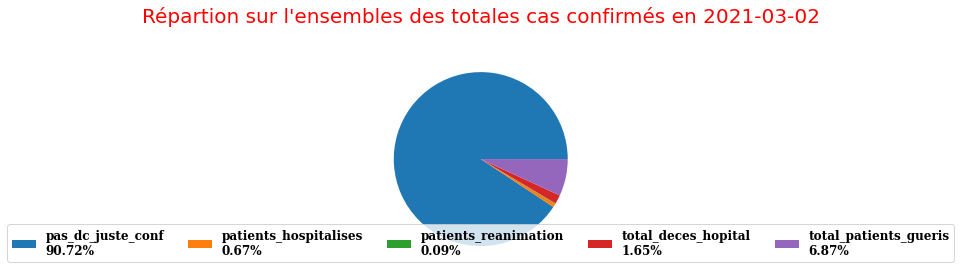

Est-ce-que le diagramme circulaire s'affiche bien, si oui taper  'oui' sinon 'non'


Votre réponse : non


******************** date                   2021-03-02
total_cas_confirmes     3783528.0
total_deces_hopital       62247.0
patients_reanimation       3586.0
patients_hospitalises     25263.0
total_patients_gueris    259893.0 ********************


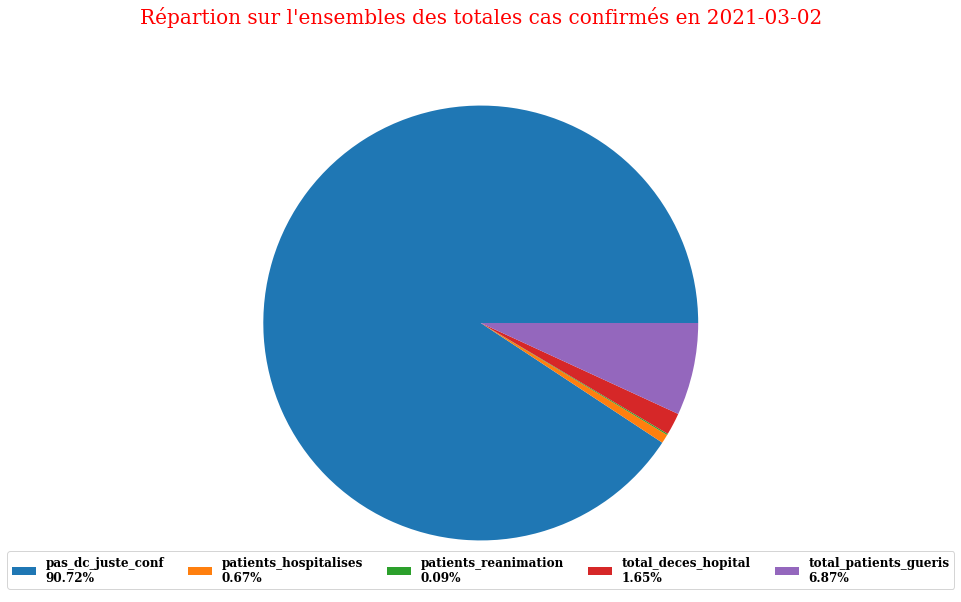

True

In [38]:
diagramme_en_fct_len()

#### **Pour conlure tout ça :** 

> Tout d'abord, si vous faîtes fonctionner les codes ci-dessus, et en prenons différents periodes vous allez constater que le nombres de totales de décés **(=impact humains)** augmente au fûr et à mesure des mois **(=en constante evolution)** enfin pas toujours. Cependant, dans ces même periodes on constate des petits changement postifs par exemple si vous comparer 3 données et vous taper **"2020-03-02"** puis **"2020-04-02"** et puis **"2020-04-02"**. Vous allez surement voir une evolution des total_deces en hopital mais regarder plus a droite ne voyez pas une longue barre bien allongée cela signifie qu'on a pu sauvé beaucoup de vie c'est à dire que c'est à ce moment qu'on a vu l'état se mettre en action. Mais malheureusement, ça n'a pas durée longtemps. **(prenez 1 donnée taper la data d'hier et vous verrez le nombre totaux de morts, c'est catastrophiques)**.

#### **Tout ce blabla! juste pour vous dire que la race humaine est ménacée ,s'agenouille devant ce simple virus alors qu'on a vu pire. Essayer tout les données possibles si vous aimez jouer avec les données mais vous allez remarquez une chose: c'est que la répartion des cas (pas décédé ou hospitalisé ou reanimé ou décés ou encore guerris ) dépand vraiment des périodes et la gentillesse des gens à ne pas se regrouper, se faire la bise , à ne pas sortir de la maison qu'on est confiné etc..** :)

---------------------------------------![Team_lost](TeamLost.jpg)---------------------------------------